In [95]:
#Using ANN called Long Short Term Memery
#We will use to predict 'Closing stock price'

In [96]:
#importing library
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime as dt

In [97]:
#Get the data
df = web.DataReader('GS', data_source = 'yahoo', start='2010-01-01', end='2022-12-12')
#showing data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,170.130005,166.929993,167.289993,168.839996,6401800.0,137.413498
2010-01-04,174.250000,169.509995,170.050003,173.080002,9135000.0,140.864319
2010-01-05,176.259995,172.570007,173.000000,176.139999,11659400.0,143.354706
2010-01-06,175.380005,173.759995,175.380005,174.259995,7381100.0,141.824692
2010-01-07,178.750000,173.949997,174.320007,177.669998,8727400.0,144.599991
...,...,...,...,...,...,...
2022-12-06,370.369995,360.329987,369.480011,362.910004,3081900.0,362.910004
2022-12-07,365.299988,358.149994,362.489990,359.920013,2128200.0,359.920013
2022-12-08,362.589996,356.059998,362.029999,358.079987,1967800.0,358.079987


In [98]:
#get row and col
df.shape

(3260, 6)

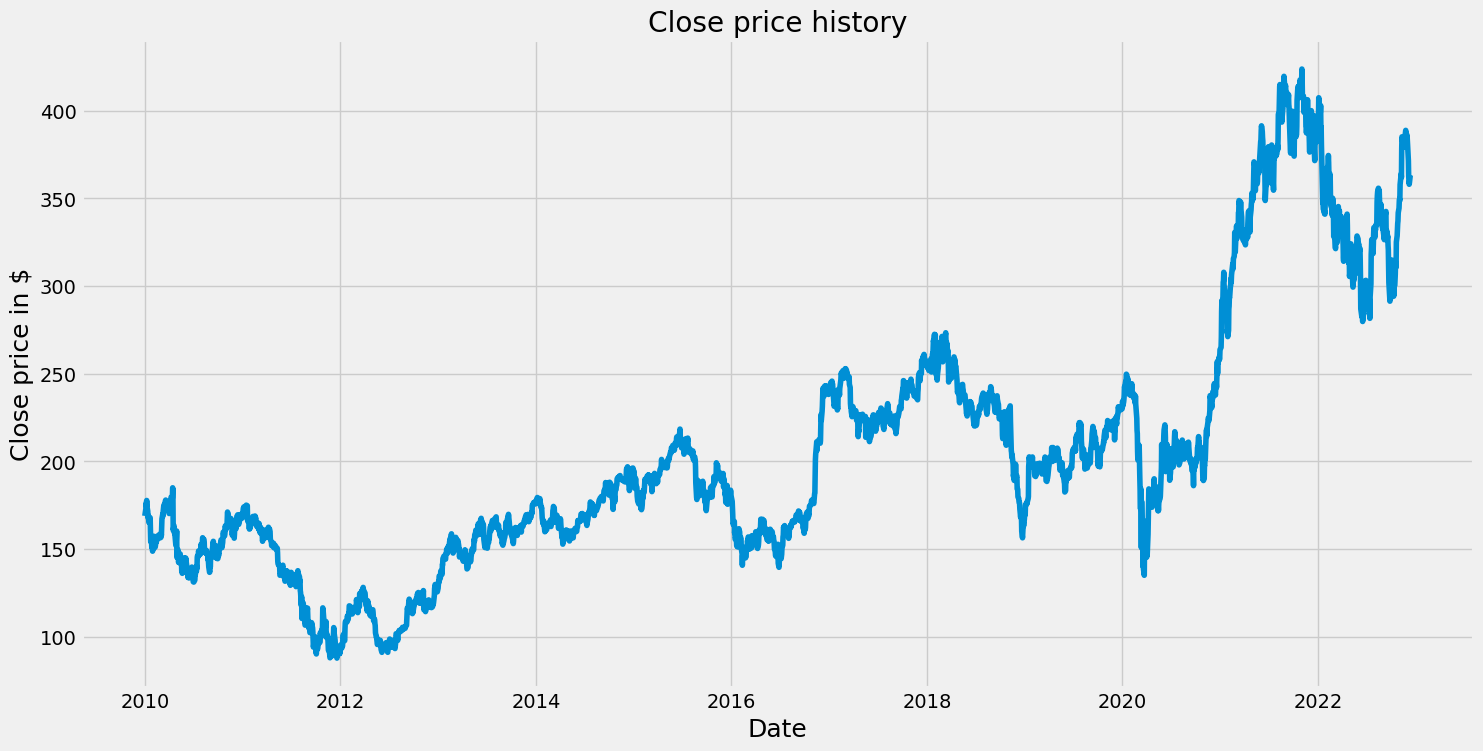

In [99]:
#ploting data focusing on closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in $',fontsize=18)
plt.show()

In [100]:
#Creating new datafram with only 'Close price column'
data = df.filter(['Close'])
#Convert the datafram to a numpy array
dataset = data.values
#Get the num of rows to train the model on
#training on 80% of data
training_data_len = math.ceil(len(dataset) * .95)

training_data_len

3097

In [101]:
#Scale the data
#Preprocesing
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.24138033],
       [0.25399376],
       [0.26309683],
       ...,
       [0.80434325],
       [0.80749668],
       [0.81951506]])

In [102]:
#Create the training dataset
#creating the scaler dataset

train_data = scaled_data[0:training_data_len, :]

#split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i,0])
    if i<=91:
        print(x_train)
        print(y_train)
        print()

[array([0.24138033, 0.25399376, 0.26309683, 0.25750408, 0.26764837,
       0.25765283, 0.24947196, 0.238346  , 0.24206458, 0.24045813,
       0.23058161, 0.23549011, 0.23825671, 0.21767067, 0.19759035,
       0.20014873, 0.18795183, 0.18979623, 0.19512121, 0.18152611,
       0.19464527, 0.20597948, 0.20684217, 0.18735682, 0.19770937,
       0.1886063 , 0.19274136, 0.1961327 , 0.19738213, 0.19702512,
       0.2073479 , 0.20693142, 0.20237988, 0.20371856, 0.20529528,
       0.2052655 , 0.21011454, 0.20449205, 0.20422433, 0.20478951,
       0.21136398, 0.20829987, 0.22582181, 0.23644205, 0.24435519,
       0.24141011, 0.25060242, 0.25527293, 0.25958652, 0.25533244])]
[0.26324558406389637]

[array([0.24138033, 0.25399376, 0.26309683, 0.25750408, 0.26764837,
       0.25765283, 0.24947196, 0.238346  , 0.24206458, 0.24045813,
       0.23058161, 0.23549011, 0.23825671, 0.21767067, 0.19759035,
       0.20014873, 0.18795183, 0.18979623, 0.19512121, 0.18152611,
       0.19464527, 0.20597948, 0.20

In [103]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [104]:
#reshape the data
#because lsdm network expect the input to be 3-dim in the form of a number of
#a number of time step and num of features
#but now our _train dataset is a d-dim

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3047, 50, 1)

In [105]:
#buid the LSTM model
model = Sequential()
#add a layer to our model with 50 nuron
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
#adding 2nd lstm layer with 50 nuron
model.add(LSTM(50, return_sequences=False))
#adding a dence layer with 25 nuron
model.add(Dense(25))
#adding last layer with only 1 nuron
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#train the mode
model.fit(x_train, y_train, batch_size=1, epochs=1)

#Creating testing dataset
#create a new array containig scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 50: , :]
#create the dataset x_test ind y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50: i, 0])

3047/3047 [==============================] - 78s 24ms/step - loss: 0.0012


In [106]:
#compile the model
#model.compile(optimizer='adam', loss='mean_squared_error')

In [107]:
#train the mode
#model.fit(x_train, y_train, batch_size=1, epochs=1)

In [108]:
""" #Creating testing dataset
#create a new array containig scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the dataset x_test ind y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0]) """

' #Creating testing dataset\n#create a new array containig scaled values from index 1543 to 2003\ntest_data = scaled_data[training_data_len - 60: , :]\n#create the dataset x_test ind y_test\nx_test = []\ny_test = dataset[training_data_len:, :]\nfor i in range(60, len(test_data)):\n    x_test.append(test_data[i-60: i, 0]) '

In [109]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [110]:
#reshape the data 2d to 3d
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [111]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 1s 14ms/step


In [112]:
#Get the Root Mean squre error(RMSE)
#rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse = rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rmse

11.322160006150192

/var/folders/kp/fb64x_lj2ysdcy62crxtzw5r0000gn/T/ipykernel_1007/1846103028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


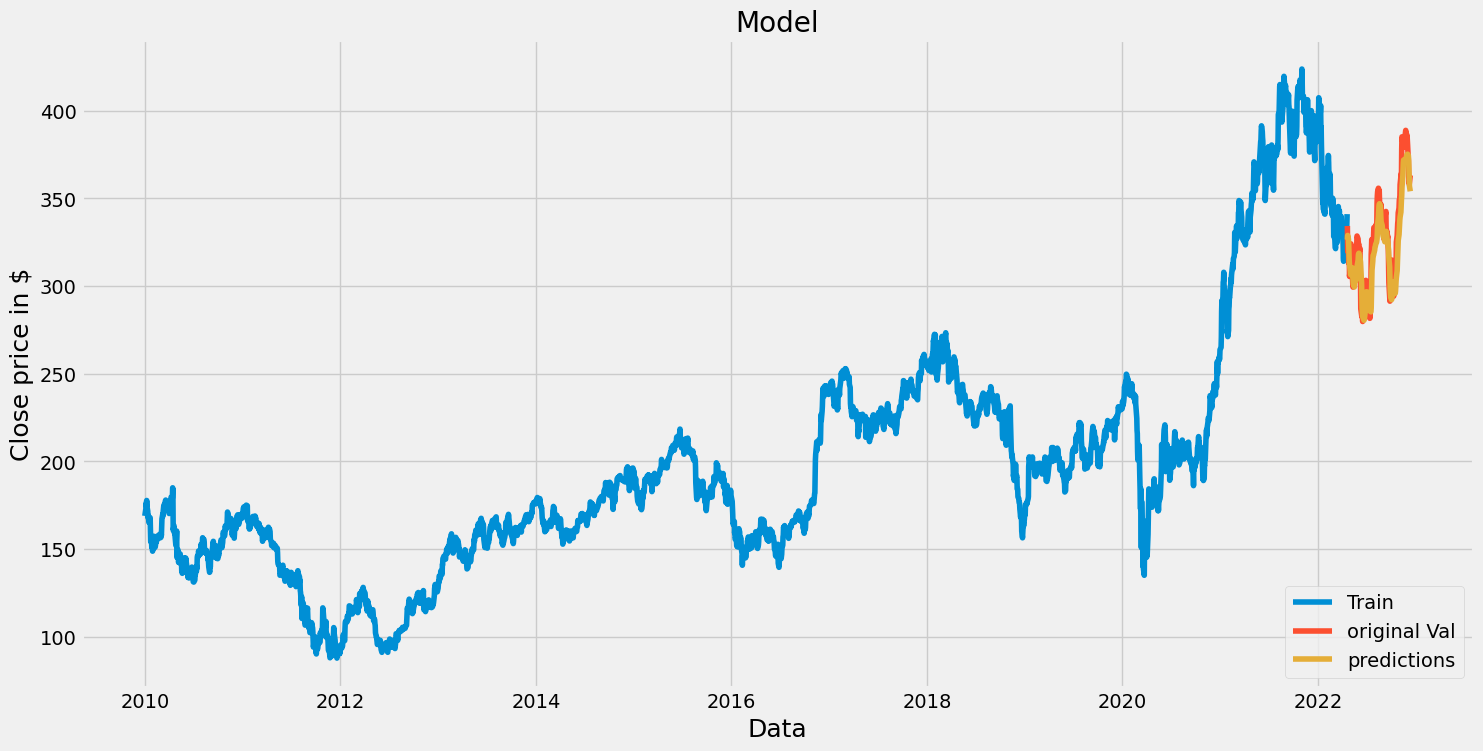

In [113]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visulation the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'original Val', 'predictions'], loc='lower right')
plt.show()

In [114]:
#show the valid and  predicted prices
valid

,Close,predictions
Date,,
2022-04-21,334.299988,326.564606
2022-04-22,319.769989,328.923370
2022-04-25,321.420013,326.758636
2022-04-26,313.119995,323.510162
2022-04-27,313.230011,318.652679
...,...,...
2022-12-06,362.910004,371.518646
2022-12-07,359.920013,366.624329
2022-12-08,358.079987,361.453247


In [115]:
apple_quote = web.DataReader('GS', data_source = 'yahoo', start='2010-01-01', end='2022-12-12')

In [116]:
#Create a new Dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 50 daya closing price values and conver the dataframe to an array
last_50_days = new_df[-50:].values
#Scale the data to be values between 0 and 1
last_50_days_scaled = scaler.transform(last_50_days)
#Create an empty list
X_test = []
#Append the past 50 days
X_test.append(last_50_days_scaled)
#Convert the x_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 43ms/step
[[353.4328]]


In [117]:
apple_quote2 = web.DataReader('GS', data_source = 'yahoo', start='2010-01-01', end='2022-12-13')
apple_quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,170.130005,166.929993,167.289993,168.839996,6401800.0,137.413544
2010-01-04,174.250000,169.509995,170.050003,173.080002,9135000.0,140.864273
2010-01-05,176.259995,172.570007,173.000000,176.139999,11659400.0,143.354782
2010-01-06,175.380005,173.759995,175.380005,174.259995,7381100.0,141.824646
2010-01-07,178.750000,173.949997,174.320007,177.669998,8727400.0,144.600021
...,...,...,...,...,...,...
2022-12-06,370.369995,360.329987,369.480011,362.910004,3081900.0,362.910004
2022-12-07,365.299988,358.149994,362.489990,359.920013,2128200.0,359.920013
2022-12-08,362.589996,356.059998,362.029999,358.079987,1967800.0,358.079987


In [118]:
measered = pred_price[0][0]
original = apple_quote2['Close'][0]
p_of_error = ((original-measered)/measered)*100
print('Predected value: ', measered, '$')
print('Real value', original, '$')
print('Error: ', p_of_error, '%')
accuracy = 100-p_of_error
print('Accuracy: ', accuracy, '%')


Predected value:  353.4328 $
Real value 168.83999633789062 $
Error:  -52.22854353134876 %
Accuracy:  152.22854353134875 %
